In [1]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
#import pandas as pd
#from rasterio.crs import CRS
#from rasterio.transform import from_origin
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle

import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize


### load pre-calving, post-calving, and all-time sliderule pickles

In [2]:
#atl06_sr_pre_path = '/home/sermilik/brunt_model/sliderule/sliderule_pre_calving.pickle'
#with open(atl06_sr_pre_path, 'rb') as handle:
#    atl06_sr_pre = pickle.load(handle)
    
#atl06_sr_post_path = '/home/sermilik/brunt_model/sliderule/sliderule_post_calving.pickle'
#with open(atl06_sr_post_path, 'rb') as handle:
#    atl06_sr_post = pickle.load(handle)
    
atl06_sr_all_path = '/home/sermilik/brunt_model/sliderule/sliderule_all_time.pickle'
with open(atl06_sr_all_path, 'rb') as handle:
    atl06_sr_all = pickle.load(handle)    

### load satellite imagery

In [3]:
#pre-calving Landsat-8

landsat_B2_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B2_merge_crop.tif"
landsat_B3_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B3_merge_crop.tif"
landsat_B4_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B4_merge_crop.tif"

landsat_B2_pre_merged = rasterio.open(landsat_B2_pre_out)
landsat_B3_pre_merged = rasterio.open(landsat_B3_pre_out)   
landsat_B4_pre_merged = rasterio.open(landsat_B4_pre_out)    

ls_B2_pre_merged = landsat_B2_pre_merged.read(1)
ls_B2_pre_merged[ls_B2_pre_merged > np.percentile(ls_B2_pre_merged,99)] = np.percentile(ls_B2_pre_merged,99)
ls_B3_pre_merged = landsat_B3_pre_merged.read(1)
ls_B3_pre_merged[ls_B3_pre_merged > np.percentile(ls_B3_pre_merged,99)] = np.percentile(ls_B3_pre_merged,99)   
ls_B4_pre_merged = landsat_B4_pre_merged.read(1)
ls_B4_pre_merged[ls_B4_pre_merged > np.percentile(ls_B4_pre_merged,99)] = np.percentile(ls_B4_pre_merged,99)    

ls_pre_merged = np.array([ls_B2_pre_merged, ls_B3_pre_merged, ls_B4_pre_merged]).transpose(1,2,0)
ls_pre_merged_norm = (ls_pre_merged * (255 / np.max(ls_pre_merged))).astype(np.uint8)

In [4]:
#calving Sentinel-2

sentinel_out_B2_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B2_ps_merge_crop.tif'
sentinel_out_B3_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B3_ps_merge_crop.tif'
sentinel_out_B4_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B4_ps_merge_crop.tif'
              
img1_2 = rasterio.open(sentinel_out_B2_ps)
img1_3 = rasterio.open(sentinel_out_B3_ps)
img1_4 = rasterio.open(sentinel_out_B4_ps)

#crop to 99th percentile (stops dull images)
image1_2 = img1_2.read(1)
image1_2[image1_2 > np.percentile(image1_2,99)] = np.percentile(image1_2,99)
image1_3 = img1_3.read(1)
image1_3[image1_3 > np.percentile(image1_3,99)] = np.percentile(image1_3,99)
image1_4 = img1_4.read(1)
image1_4[image1_4 > np.percentile(image1_4,99)] = np.percentile(image1_4,99)

image1 = np.array([image1_2, image1_3, image1_4]).transpose(1,2,0)
s2_calve_norm1 = (image1 * (255 / np.max(image1))).astype(np.uint8)

### Plots of RGTs crossing the pre- and post-calving calving fronts through time

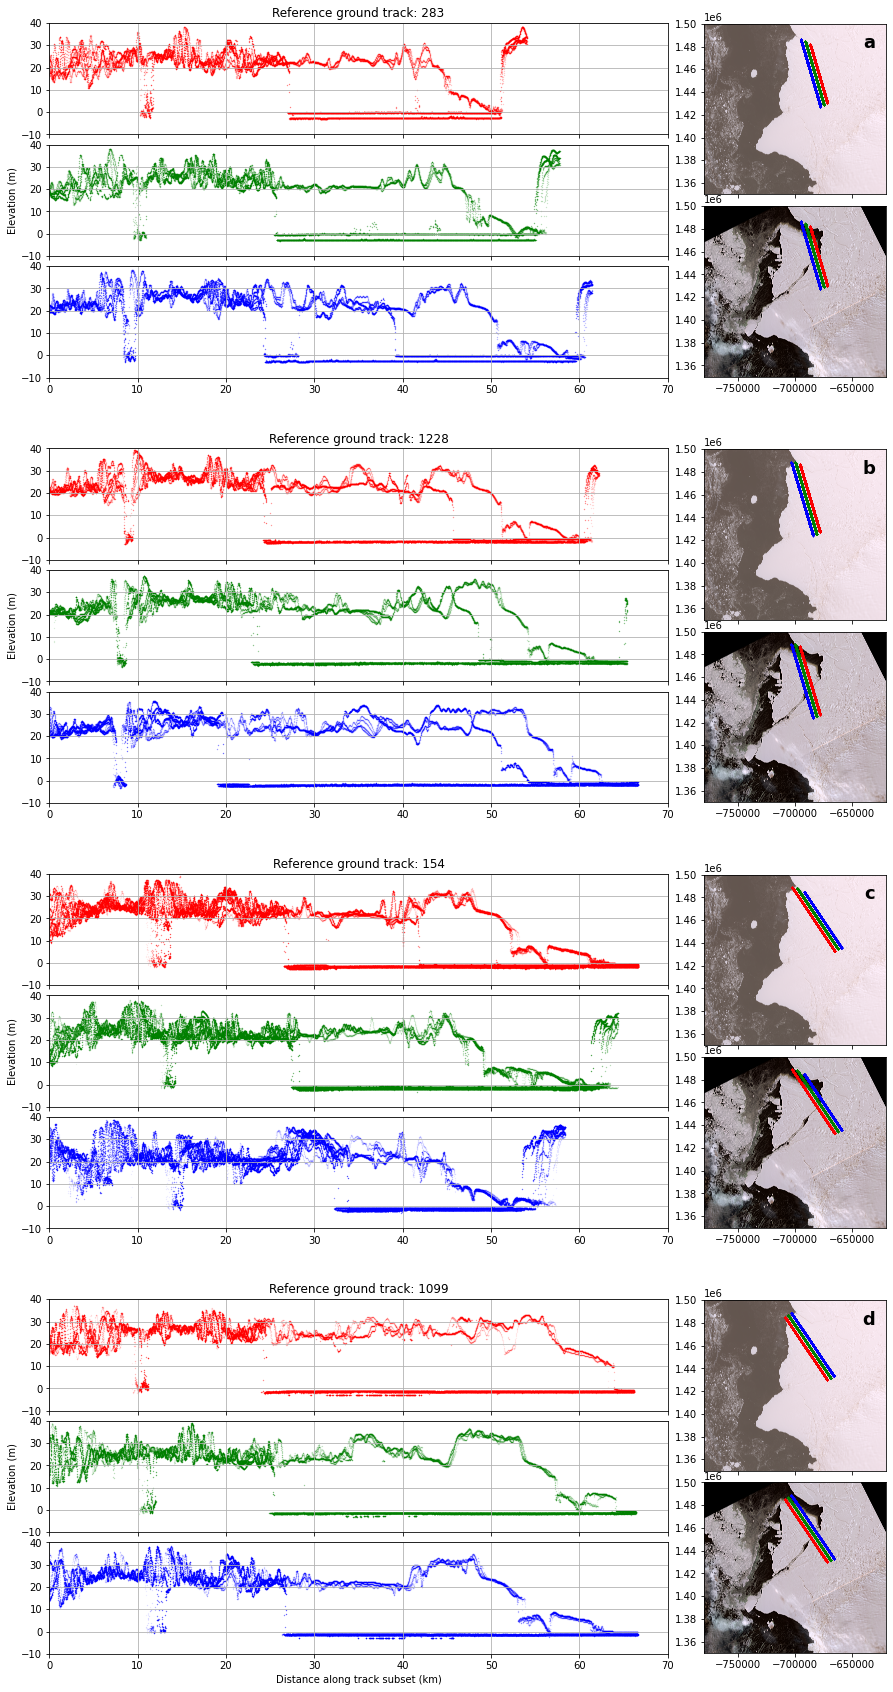

In [5]:
xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

#y axis
vvmin = -10
vvmax = 40 #50
#x axis
xplotmin = 1580000 #1550000
xplotmax = 1650000
#size
sz=0.1

#spots = [1,3,5]
gts = [10,30,50]
nums = [0,1,2,3] #[0,1,2,3,4,5,6,7,8,9,10,11]
#rgts_all = [154,215,276,283,344,657,718,786,1099,1160,1228,1289]
rgts_all = [283,1228,154,1099] #[283,1228,154,1099,786,657,344,215,1160,1289,718,276]
cycles = [5,6,7,8,9,10,11,12,13,14,15] #11 cycles
calpha = np.linspace(0.1,1,len(cycles))

#fig,ax=plt.subplots(4,2,figsize=(15,15),gridspec_kw={'width_ratios': [3,1], 'height_ratios': [1,1,1,1],'wspace': 0.1,'hspace': 0.1})

fig = plt.figure(figsize=(15, 30))

gs = gridspec.GridSpec(27, 4)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:2,0:3]) #rgt 283 gt 10
ax2 = plt.subplot(gs[2:4,0:3]) #rgt 283 gt 30
ax3 = plt.subplot(gs[4:6,0:3]) #rgt 283 gt 50
ax4 = plt.subplot(gs[0:3,3:4])
ax5 = plt.subplot(gs[3:6,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax4)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax5)

#283 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax1.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax1.scatter(x,y,s=sz,c='r')
ax1.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax1.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax4.annotate('283',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#283 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax2.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax2.scatter(x,y,s=sz,c='g')
ax2.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax2.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#283 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==283) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax3.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax3.scatter(x,y,s=sz,c='b')
ax3.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax3.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')



#--------------------------------------------------
ax6 = plt.subplot(gs[7:9,0:3]) #rgt 1228 gt 10
ax7 = plt.subplot(gs[9:11,0:3]) #rgt 1228 gt 30
ax8 = plt.subplot(gs[11:13,0:3]) #rgt 1228 gt 50
ax9 = plt.subplot(gs[7:10,3:4])
ax10 = plt.subplot(gs[10:13,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax9)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax10)

#1228 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax6.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax6.scatter(x,y,s=sz,c='r')
ax6.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax6.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax9.annotate('1228',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#1228 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax7.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax7.scatter(x,y,s=sz,c='g')
ax7.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax7.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#1228 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1228) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax8.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax8.scatter(x,y,s=sz,c='b')
ax8.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax8.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')

#--------------------------------------------------
ax11 = plt.subplot(gs[14:16,0:3]) #rgt 154 gt 10
ax12 = plt.subplot(gs[16:18,0:3]) #rgt 154 gt 30
ax13 = plt.subplot(gs[18:20,0:3]) #rgt 154 gt 50
ax14 = plt.subplot(gs[14:17,3:4])
ax15 = plt.subplot(gs[17:20,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax14)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax15)

#154 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax11.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax11.scatter(x,y,s=sz,c='r')
ax11.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax11.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax14.annotate('154',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#154 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax12.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax12.scatter(x,y,s=sz,c='g')
ax12.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax12.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#154 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==154) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax13.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax13.scatter(x,y,s=sz,c='b')
ax13.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax13.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')

#--------------------------------------------------
ax16 = plt.subplot(gs[21:23,0:3]) #rgt 1099 gt 10
ax17 = plt.subplot(gs[23:25,0:3]) #rgt 1099 gt 30
ax18 = plt.subplot(gs[25:27,0:3]) #rgt 1099 gt 50
ax19 = plt.subplot(gs[21:24,3:4])
ax20 = plt.subplot(gs[24:27,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax19)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax20)

#1099 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax16.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax16.scatter(x,y,s=sz,c='r')
ax16.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax16.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax19.annotate('1099',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#1099 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax17.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax17.scatter(x,y,s=sz,c='g')
ax17.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax17.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#1099 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1099) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax18.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax18.scatter(x,y,s=sz,c='b')
ax18.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax18.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')

#--------------------------------------------------
ax1.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax1.set_ylim(vvmin,vvmax)
ax2.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax2.set_ylim(vvmin,vvmax)
ax3.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax3.set_ylim(vvmin,vvmax)
ax6.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax6.set_ylim(vvmin,vvmax)
ax7.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax7.set_ylim(vvmin,vvmax)
ax8.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax8.set_ylim(vvmin,vvmax)
ax11.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax11.set_ylim(vvmin,vvmax)
ax12.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax12.set_ylim(vvmin,vvmax)
ax13.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax13.set_ylim(vvmin,vvmax)
ax16.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax16.set_ylim(vvmin,vvmax)
ax17.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax17.set_ylim(vvmin,vvmax)
ax18.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax18.set_ylim(vvmin,vvmax)

ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax5.set_xlim(xmin,xmax)
ax5.set_ylim(ymin,ymax)
ax9.set_xlim(xmin,xmax)
ax9.set_ylim(ymin,ymax)
ax10.set_xlim(xmin,xmax)
ax10.set_ylim(ymin,ymax)
ax14.set_xlim(xmin,xmax)
ax14.set_ylim(ymin,ymax)
ax15.set_xlim(xmin,xmax)
ax15.set_ylim(ymin,ymax)
ax19.set_xlim(xmin,xmax)
ax19.set_ylim(ymin,ymax)
ax20.set_xlim(xmin,xmax)
ax20.set_ylim(ymin,ymax)

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax11.set_xticklabels([])
ax12.set_xticklabels([])
ax16.set_xticklabels([])
ax17.set_xticklabels([])

ax4.set_xticklabels([])
ax5.locator_params(axis='x', nbins=3)
ax9.set_xticklabels([])
ax10.locator_params(axis='x', nbins=3)
ax14.set_xticklabels([])
ax15.locator_params(axis='x', nbins=3)
ax19.set_xticklabels([])
ax20.locator_params(axis='x', nbins=3)

ax4.annotate('a',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax9.annotate('b',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax14.annotate('c',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax19.annotate('d',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title("Reference ground track: 283")
ax6.set_title("Reference ground track: 1228")
ax11.set_title("Reference ground track: 154")
ax16.set_title("Reference ground track: 1099")

ax2.set_ylabel('Elevation (m)')
ax7.set_ylabel('Elevation (m)')
ax12.set_ylabel('Elevation (m)')
ax17.set_ylabel('Elevation (m)')
ax18.set_xlabel('Distance along track subset (km)')

#plt.tight_layout()

output = './figures/figS18_calving_front_elevation_1.png'
plt.savefig(output,dpi=100, bbox_inches='tight')

plt.show()




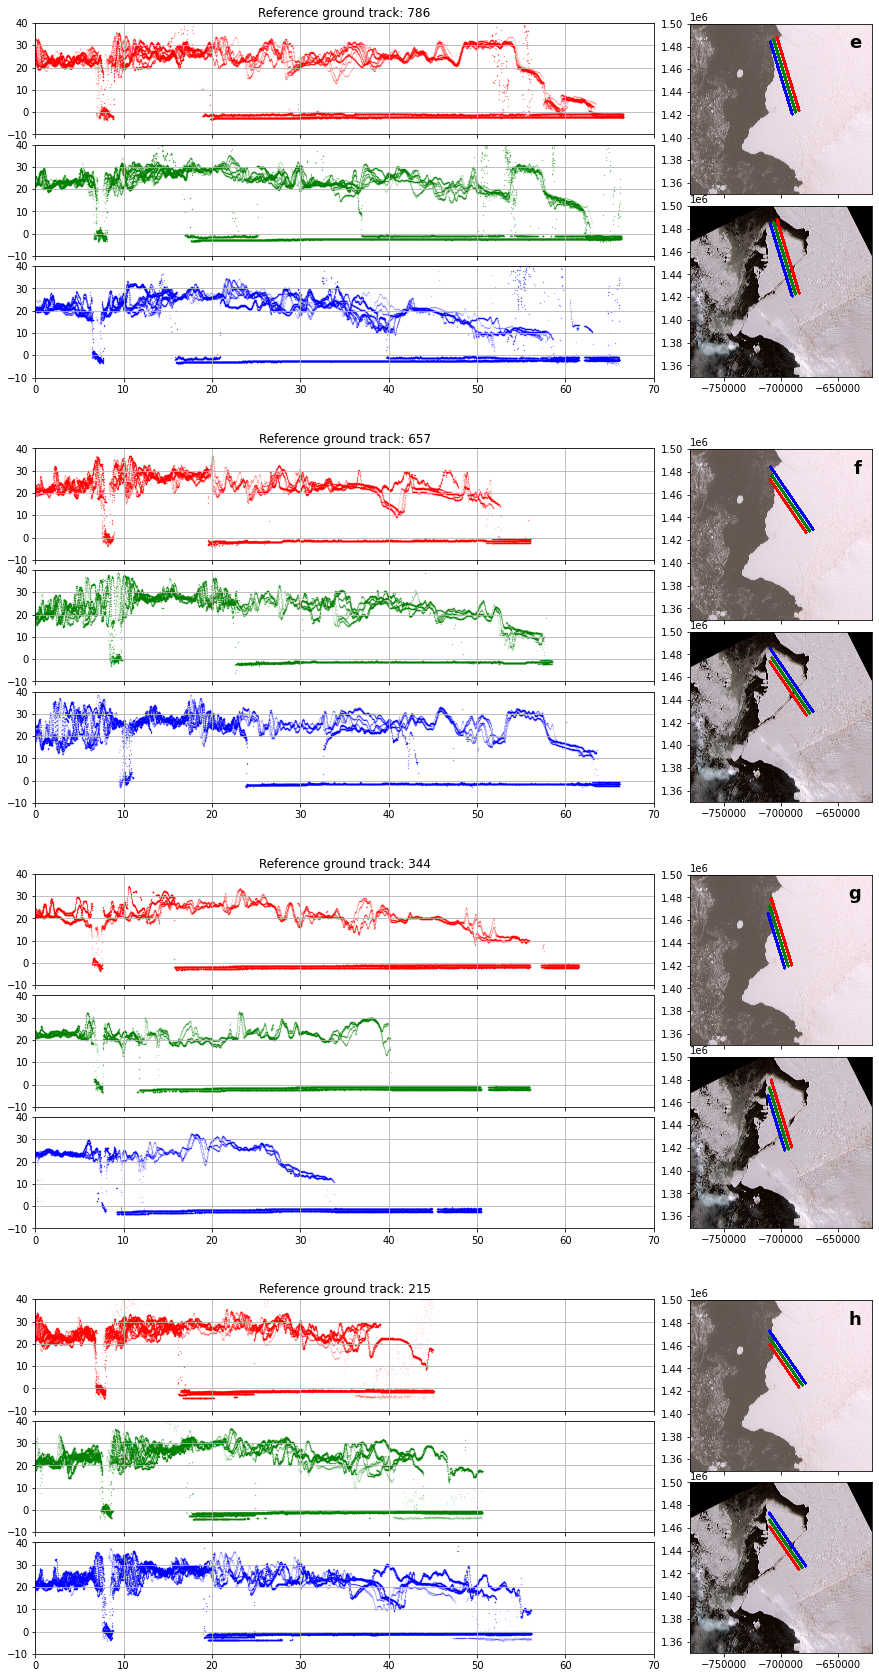

In [6]:
rgts_all = [786,657,344,215] #[283,1228,154,1099,786,657,344,215,1160,1289,718,276]

fig = plt.figure(figsize=(15, 30))

gs = gridspec.GridSpec(27, 4)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:2,0:3]) #rgt 786 gt 10
ax2 = plt.subplot(gs[2:4,0:3]) #rgt 786 gt 30
ax3 = plt.subplot(gs[4:6,0:3]) #rgt 786 gt 50
ax4 = plt.subplot(gs[0:3,3:4])
ax5 = plt.subplot(gs[3:6,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax4)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax5)

#786 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax1.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax1.scatter(x,y,s=sz,c='r')
ax1.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax1.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax4.annotate('786',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#786 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax2.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax2.scatter(x,y,s=sz,c='g')
ax2.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax2.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#786 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==786) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax3.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax3.scatter(x,y,s=sz,c='b')
ax3.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax3.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')




#--------------------------------------------------
ax6 = plt.subplot(gs[7:9,0:3]) #rgt 657 gt 10
ax7 = plt.subplot(gs[9:11,0:3]) #rgt 657 gt 30
ax8 = plt.subplot(gs[11:13,0:3]) #rgt 657 gt 50
ax9 = plt.subplot(gs[7:10,3:4])
ax10 = plt.subplot(gs[10:13,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax9)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax10)

#657 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax6.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax6.scatter(x,y,s=sz,c='r')
ax6.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax6.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax9.annotate('657',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#657 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax7.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax7.scatter(x,y,s=sz,c='g')
ax7.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax7.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#657 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==657) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax8.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax8.scatter(x,y,s=sz,c='b')
ax8.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax8.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')



#--------------------------------------------------
ax11 = plt.subplot(gs[14:16,0:3]) #rgt 344 gt 10
ax12 = plt.subplot(gs[16:18,0:3]) #rgt 344 gt 30
ax13 = plt.subplot(gs[18:20,0:3]) #rgt 344 gt 50
ax14 = plt.subplot(gs[14:17,3:4])
ax15 = plt.subplot(gs[17:20,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax14)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax15)

#344 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax11.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax11.scatter(x,y,s=sz,c='r')
ax11.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax11.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax14.annotate('344',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#154 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax12.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax12.scatter(x,y,s=sz,c='g')
ax12.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax12.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#344 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==344) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax13.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax13.scatter(x,y,s=sz,c='b')
ax13.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax13.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')


#--------------------------------------------------
ax16 = plt.subplot(gs[21:23,0:3]) #rgt 215 gt 10
ax17 = plt.subplot(gs[23:25,0:3]) #rgt 215 gt 30
ax18 = plt.subplot(gs[25:27,0:3]) #rgt 215 gt 50
ax19 = plt.subplot(gs[21:24,3:4])
ax20 = plt.subplot(gs[24:27,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax19)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax20)

#215 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax16.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax16.scatter(x,y,s=sz,c='r')
ax16.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax16.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax19.annotate('215',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#215 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax17.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax17.scatter(x,y,s=sz,c='g')
ax17.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax17.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#215 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==215) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax18.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax18.scatter(x,y,s=sz,c='b')
ax18.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax18.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')

#--------------------------------------------------
ax1.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax1.set_ylim(vvmin,vvmax)
ax2.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax2.set_ylim(vvmin,vvmax)
ax3.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax3.set_ylim(vvmin,vvmax)
ax6.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax6.set_ylim(vvmin,vvmax)
ax7.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax7.set_ylim(vvmin,vvmax)
ax8.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax8.set_ylim(vvmin,vvmax)
ax11.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax11.set_ylim(vvmin,vvmax)
ax12.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax12.set_ylim(vvmin,vvmax)
ax13.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax13.set_ylim(vvmin,vvmax)
ax16.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax16.set_ylim(vvmin,vvmax)
ax17.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax17.set_ylim(vvmin,vvmax)
ax18.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax18.set_ylim(vvmin,vvmax)

ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax5.set_xlim(xmin,xmax)
ax5.set_ylim(ymin,ymax)
ax9.set_xlim(xmin,xmax)
ax9.set_ylim(ymin,ymax)
ax10.set_xlim(xmin,xmax)
ax10.set_ylim(ymin,ymax)
ax14.set_xlim(xmin,xmax)
ax14.set_ylim(ymin,ymax)
ax15.set_xlim(xmin,xmax)
ax15.set_ylim(ymin,ymax)
ax19.set_xlim(xmin,xmax)
ax19.set_ylim(ymin,ymax)
ax20.set_xlim(xmin,xmax)
ax20.set_ylim(ymin,ymax)

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax11.set_xticklabels([])
ax12.set_xticklabels([])
ax16.set_xticklabels([])
ax17.set_xticklabels([])

ax4.set_xticklabels([])
ax5.locator_params(axis='x', nbins=3)
ax9.set_xticklabels([])
ax10.locator_params(axis='x', nbins=3)
ax14.set_xticklabels([])
ax15.locator_params(axis='x', nbins=3)
ax19.set_xticklabels([])
ax20.locator_params(axis='x', nbins=3)

ax4.annotate('e',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax9.annotate('f',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax14.annotate('g',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax19.annotate('h',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title("Reference ground track: 786")
ax6.set_title("Reference ground track: 657")
ax11.set_title("Reference ground track: 344")
ax16.set_title("Reference ground track: 215")

#plt.tight_layout()

output = './figures/figS19_calving_front_elevation_2.png'
plt.savefig(output,dpi=100, bbox_inches='tight')

plt.show()





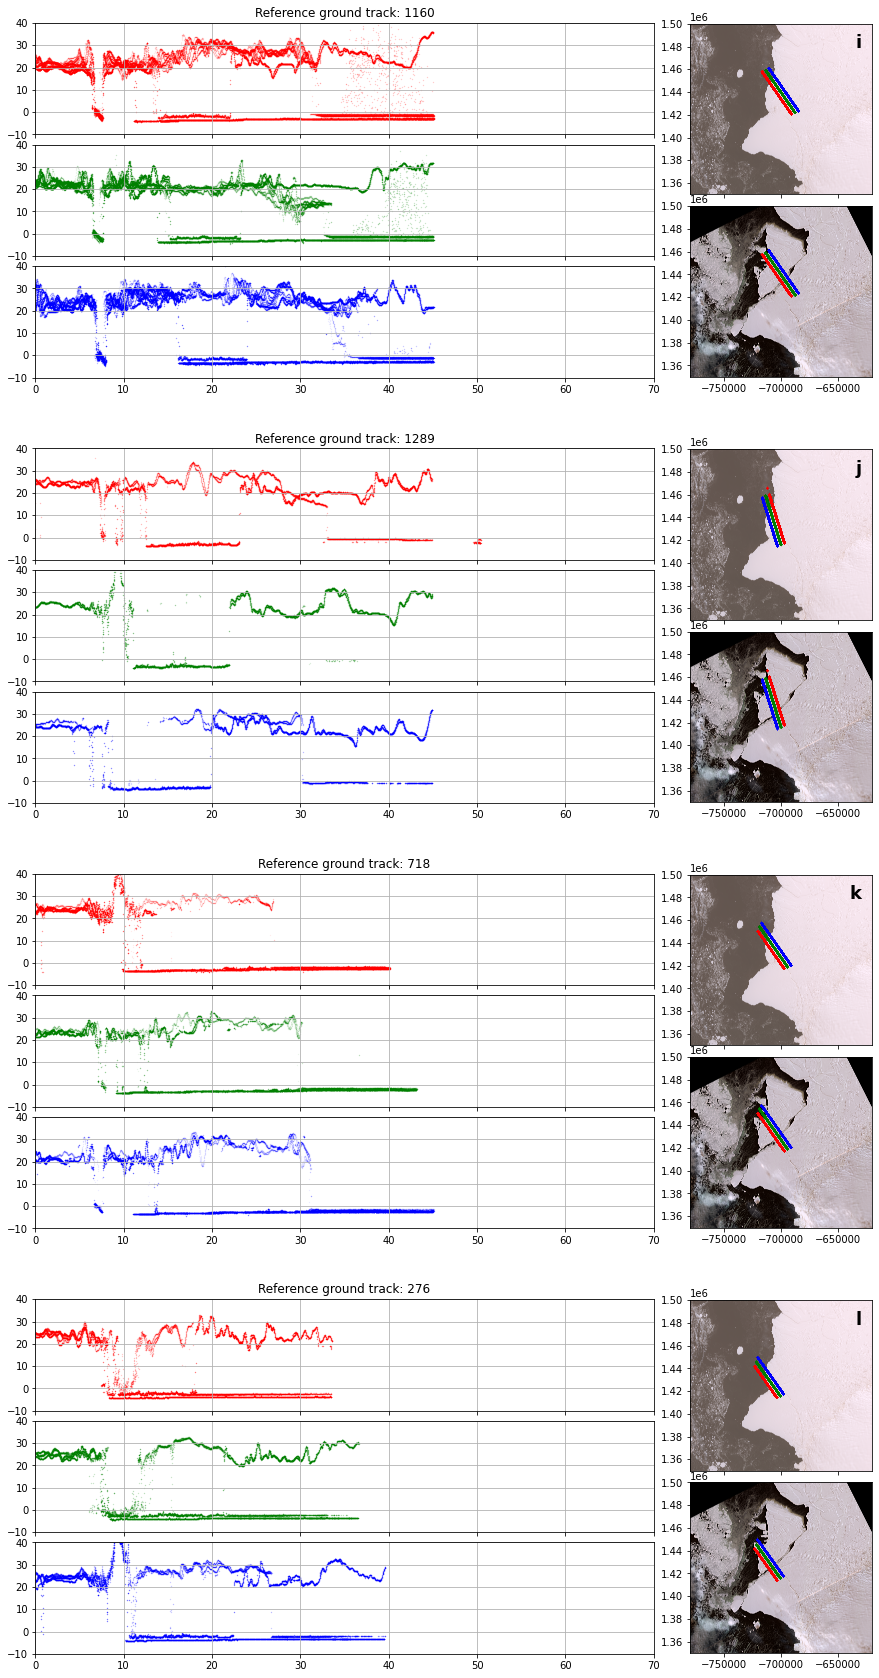

In [7]:
rgts_all = [1160,1289,718,276] #[283,1228,154,1099,786,657,344,215,1160,1289,718,276]

fig = plt.figure(figsize=(15, 30))

gs = gridspec.GridSpec(27, 4)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:2,0:3]) #rgt 1160 gt 10
ax2 = plt.subplot(gs[2:4,0:3]) #rgt 1160 gt 30
ax3 = plt.subplot(gs[4:6,0:3]) #rgt 1160 gt 50
ax4 = plt.subplot(gs[0:3,3:4])
ax5 = plt.subplot(gs[3:6,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax4)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax5)

#1160 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax1.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax1.scatter(x,y,s=sz,c='r')
ax1.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax1.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax4.annotate('1160',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#1160 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax2.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax2.scatter(x,y,s=sz,c='g')
ax2.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax2.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#1160 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1160) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax3.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax3.scatter(x,y,s=sz,c='b')
ax3.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax3.grid()

#ax4.scatter(E,N,s=sz,c='k')
ax4.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax5.scatter(E,N,s=sz,c='k')
ax5.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')



#--------------------------------------------------
ax6 = plt.subplot(gs[7:9,0:3]) #rgt 1289 gt 10
ax7 = plt.subplot(gs[9:11,0:3]) #rgt 1289 gt 30
ax8 = plt.subplot(gs[11:13,0:3]) #rgt 1289 gt 50
ax9 = plt.subplot(gs[7:10,3:4])
ax10 = plt.subplot(gs[10:13,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax9)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax10)

#1289 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax6.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax6.scatter(x,y,s=sz,c='r')
ax6.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax6.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax9.annotate('1289',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#1289 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax7.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax7.scatter(x,y,s=sz,c='g')
ax7.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax7.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#1289 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==1289) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax8.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax8.scatter(x,y,s=sz,c='b')
ax8.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax8.grid()

#ax9.scatter(E,N,s=sz,c='k')
ax9.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax10.scatter(E,N,s=sz,c='k')
ax10.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')




#--------------------------------------------------
ax11 = plt.subplot(gs[14:16,0:3]) #rgt 718 gt 10
ax12 = plt.subplot(gs[16:18,0:3]) #rgt 718 gt 30
ax13 = plt.subplot(gs[18:20,0:3]) #rgt 718 gt 50
ax14 = plt.subplot(gs[14:17,3:4])
ax15 = plt.subplot(gs[17:20,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax14)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax15)

#718 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax11.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax11.scatter(x,y,s=sz,c='r')
ax11.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax11.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax14.annotate('718',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#154 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax12.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax12.scatter(x,y,s=sz,c='g')
ax12.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax12.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#718 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==718) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax13.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax13.scatter(x,y,s=sz,c='b')
ax13.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax13.grid()

#ax14.scatter(E,N,s=sz,c='k')
ax14.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax15.scatter(E,N,s=sz,c='k')
ax15.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')


#--------------------------------------------------
ax16 = plt.subplot(gs[21:23,0:3]) #rgt 276 gt 10
ax17 = plt.subplot(gs[23:25,0:3]) #rgt 276 gt 30
ax18 = plt.subplot(gs[25:27,0:3]) #rgt 276 gt 50
ax19 = plt.subplot(gs[21:24,3:4])
ax20 = plt.subplot(gs[24:27,3:4])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax19)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax20)

#276 gt 10 20
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==10) | (atl06_sr_all["gt"]==20)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax16.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='r',alpha=calpha[i])

#ax16.scatter(x,y,s=sz,c='r')
ax16.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax16.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='r')
#ax19.annotate('276',(xmax-((0.025)*(xmax-xmin)),ymin+(0.025*(ymax-ymin))),size=12,ha='right',va='bottom')

#1099 gt 30 40
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==30) | (atl06_sr_all["gt"]==40)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax17.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='g',alpha=calpha[i])

#ax17.scatter(x,y,s=sz,c='g')
ax17.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax17.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='g')

#276 gt 50 60
E = atl06_sr_all["E"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
N = atl06_sr_all["N"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
y = atl06_sr_all["ht"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
ncyc = atl06_sr_all["cycle"][(atl06_sr_all["rgt"]==276) & ((atl06_sr_all["gt"]==50) | (atl06_sr_all["gt"]==60)) & (atl06_sr_all["cycle"]>4)]
x = np.sqrt(E**2 +  N**2)

for i in range(0,len(cycles)):
    Ecyc = E[ncyc==cycles[i]]
    Ncyc = N[ncyc==cycles[i]]
    ycyc = y[ncyc==cycles[i]]
    xcyc = np.sqrt(Ecyc**2 +  Ncyc**2)
    ax18.scatter((xcyc-xplotmin)/1000,ycyc,s=sz,c='b',alpha=calpha[i])

#ax18.scatter(x,y,s=sz,c='b')
ax18.plot([xplotmin,xplotmax],[-2,-2],'--',color=[0.75,0.75,0.75])
ax18.grid()

#ax19.scatter(E,N,s=sz,c='k')
ax19.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')
#ax20.scatter(E,N,s=sz,c='k')
ax20.scatter(E[(x<xplotmax) & (x>xplotmin)],N[(x<xplotmax) & (x>xplotmin)],s=sz,c='b')

#--------------------------------------------------
ax1.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax1.set_ylim(vvmin,vvmax)
ax2.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax2.set_ylim(vvmin,vvmax)
ax3.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax3.set_ylim(vvmin,vvmax)
ax6.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax6.set_ylim(vvmin,vvmax)
ax7.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax7.set_ylim(vvmin,vvmax)
ax8.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax8.set_ylim(vvmin,vvmax)
ax11.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax11.set_ylim(vvmin,vvmax)
ax12.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax12.set_ylim(vvmin,vvmax)
ax13.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax13.set_ylim(vvmin,vvmax)
ax16.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax16.set_ylim(vvmin,vvmax)
ax17.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax17.set_ylim(vvmin,vvmax)
ax18.set_xlim((xplotmin-xplotmin)/1000,(xplotmax-xplotmin)/1000)
ax18.set_ylim(vvmin,vvmax)


ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax5.set_xlim(xmin,xmax)
ax5.set_ylim(ymin,ymax)
ax9.set_xlim(xmin,xmax)
ax9.set_ylim(ymin,ymax)
ax10.set_xlim(xmin,xmax)
ax10.set_ylim(ymin,ymax)
ax14.set_xlim(xmin,xmax)
ax14.set_ylim(ymin,ymax)
ax15.set_xlim(xmin,xmax)
ax15.set_ylim(ymin,ymax)
ax19.set_xlim(xmin,xmax)
ax19.set_ylim(ymin,ymax)
ax20.set_xlim(xmin,xmax)
ax20.set_ylim(ymin,ymax)

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax11.set_xticklabels([])
ax12.set_xticklabels([])
ax16.set_xticklabels([])
ax17.set_xticklabels([])

ax4.set_xticklabels([])
ax5.locator_params(axis='x', nbins=3)
ax9.set_xticklabels([])
ax10.locator_params(axis='x', nbins=3)
ax14.set_xticklabels([])
ax15.locator_params(axis='x', nbins=3)
ax19.set_xticklabels([])
ax20.locator_params(axis='x', nbins=3)

ax4.annotate('i',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax9.annotate('j',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax14.annotate('k',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax19.annotate('l',(xmax-((0.06)*(xmax-xmin)),ymax-(0.06*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title("Reference ground track: 1160")
ax6.set_title("Reference ground track: 1289")
ax11.set_title("Reference ground track: 718")
ax16.set_title("Reference ground track: 276")

#plt.tight_layout()

output = './figures/figS20_calving_front_elevation_3.png'
plt.savefig(output,dpi=100, bbox_inches='tight')


plt.show()




